In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/student_data.csv')
df.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


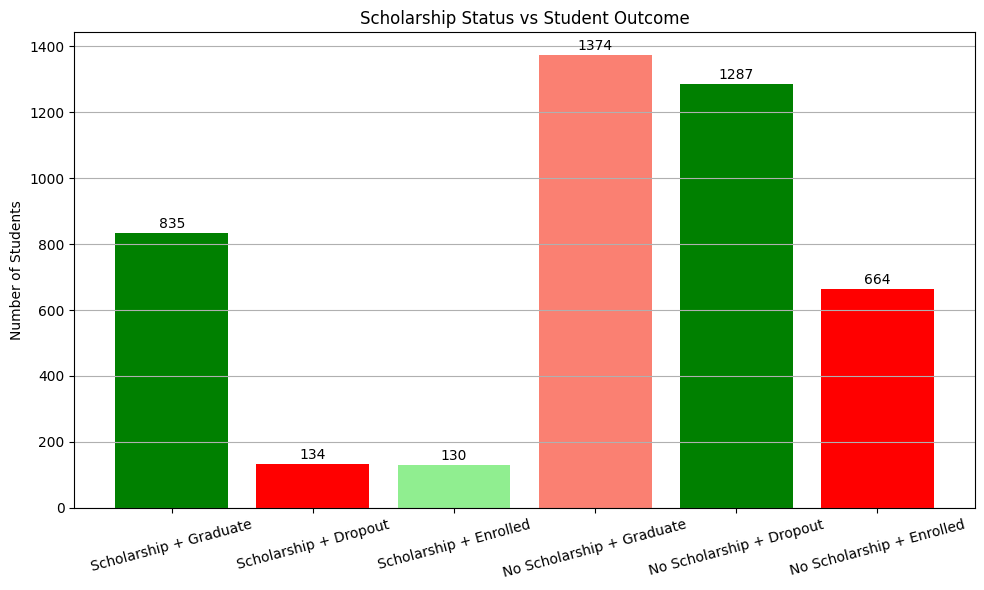

In [9]:
import matplotlib.pyplot as plt

# Filtered groups (make sure to use parentheses around conditions!)
df_sc_holder_grad = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Graduate')]
df_sc_holder_drop = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Dropout')]
df_sc_holder_enrolled = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Enrolled')]
df_sc_not_grad = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Graduate')]
df_sc_not_drop = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Dropout')]
df_sc_not_enrolled = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Enrolled')]


# Count values
counts = [
    len(df_sc_holder_grad),
    len(df_sc_holder_drop),
    len(df_sc_holder_enrolled),
    len(df_sc_not_grad),
    len(df_sc_not_drop),
    len(df_sc_not_enrolled)
]

labels = [
    "Scholarship + Graduate",
    "Scholarship + Dropout",
    "Scholarship + Enrolled",
    "No Scholarship + Graduate",
    "No Scholarship + Dropout",
    "No Scholarship + Enrolled",
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=["green", "red", "lightgreen", "salmon"])
plt.title("Scholarship Status vs Student Outcome")
plt.ylabel("Number of Students")
plt.xticks(rotation=15)
plt.grid(axis="y")

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [20]:
# no scholarship dropout rate
df_sc_not_grad = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Graduate')]
df_sc_not_drop = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Dropout')]
df_sc_not_enrolled = df[(df["Scholarship holder"] == 0) & (df["Output"] == 'Enrolled')]

total_no_scholarship = len(df_sc_not_drop) + len(df_sc_not_grad) + len(df_sc_not_enrolled)
no_sc_dropout_rate = len(df_sc_not_drop) / total_no_scholarship

print("Dropout rate among non-scholarship students:", round(no_sc_dropout_rate, 2))

# scholarship dropout rate
df_sc_holder_grad = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Graduate')]
df_sc_holder_drop = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Dropout')]
df_sc_holder_enrolled = df[(df["Scholarship holder"] == 1) & (df["Output"] == 'Enrolled')]

total_no_scholarship = len(df_sc_holder_drop) + len(df_sc_holder_grad) + len(df_sc_holder_enrolled)
sc_dropout_rate = len(df_sc_holder_drop) / total_no_scholarship

print("Dropout rate among scholarship students:", round(sc_dropout_rate, 2))

# percent difference
p_diff = round(((no_sc_dropout_rate - sc_dropout_rate)/sc_dropout_rate)*100,2)
print(f'Dropout rate percent diff: {p_diff}%')


Dropout rate among non-scholarship students: 0.39
Dropout rate among scholarship students: 0.12
Dropout rate percent diff: 217.45%
